### Compute correl/regress coeff maps

In [11]:
alphafdr = 0.1

[bvss_cp_tot_anom_rc, bvss_cp_tot_anom_int, bvss_cp_tot_anom_rc_pval,
 bvss_cp_tot_anom_cc, bvss_cp_tot_anom_cc_pval, _
]=gettemprcmap_loop(skj_cp_tot_anom,bet_cp_tot_anom,'bvss_cp_tot')
bvss_cp_tot_anom_rc_ptf = controlfdr2d(bvss_cp_tot_anom_rc_pval,alphafdr)
bvss_cp_tot_anom_cc_ptf = controlfdr2d(bvss_cp_tot_anom_cc_pval,alphafdr)

### Plot

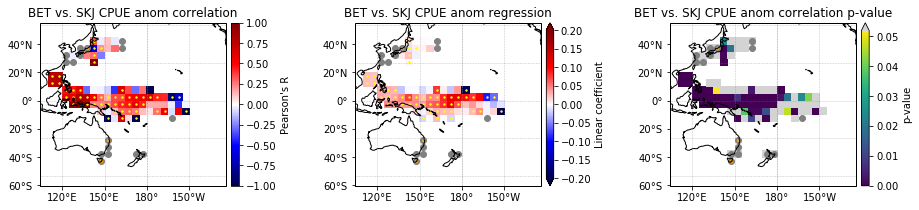

In [16]:
# - Set proj and define axes
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)})

# - Make maps pretty
for ax in axes:
    exec(open('helper_scripts/create_map_bgs.py').read())

# - Plot
bvss_cp_tot_anom_cc.plot(ax=axes[0], transform=ccrs.PlateCarree(),
                         cmap=cm.seismic,
                         cbar_kwargs={'pad': 0.02, 'label': 'Pearson\'s R'});
[signiflonnow,signiflatnow]=find_where_pval_small(bvss_cp_tot_anom_cc_pval,bvss_cp_tot_anom_cc_ptf)
axes[0].scatter(signiflonnow, signiflatnow,
                c='yellow', s=2, transform=ccrs.PlateCarree());
axes[0].set_xlabel(''); axes[0].set_ylabel('');
axes[0].set_title('BET vs. SKJ CPUE anom correlation')

bvss_cp_tot_anom_rc.plot(ax=axes[1], transform=ccrs.PlateCarree(),
                         cmap=cm.seismic, vmin=-0.2, vmax=0.2,
                         cbar_kwargs={'pad': 0.02, 'label': 'Linear coefficient', 'extend': 'both'});
[signiflonnow,signiflatnow]=find_where_pval_small(bvss_cp_tot_anom_rc_pval,bvss_cp_tot_anom_rc_ptf)
axes[1].scatter(signiflonnow, signiflatnow,
                c='yellow', s=2, transform=ccrs.PlateCarree());
axes[1].set_xlabel(''); axes[1].set_ylabel('');
axes[1].set_title('BET vs. SKJ CPUE anom regression')

cmapnow = cm.viridis
cmapnow.set_over('lightgray')
bvss_cp_tot_anom_rc_pval.plot(ax=axes[2], transform=ccrs.PlateCarree(),
                              cmap=cmapnow, vmax=bvss_cp_tot_anom_rc_ptf,
                              cbar_kwargs={'pad': 0.02, 'label': 'p-value', 'extend': 'max'});
axes[2].set_xlabel(''); axes[2].set_ylabel('');
axes[2].set_title('BET vs. SKJ CPUE anom correlation p-value');

fig.savefig(figpath + 'mainfig3_bvsscpue_anoms_correl_regress.png', bbox_inches='tight', pad_inches = 0, dpi = 200)